# Box Atlas

In [1]:
%load_ext autoreload
%autoreload 2
# %pylab notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from copy import copy
from pympc.geometry.polytope import Polytope
from pympc.dynamical_systems import DTAffineSystem, DTPWASystem, dare
import pympc.plot as mpc_plt
from pympc.control import MPCHybridController

Acronyms:
q -> position, v -> velocity, f -> contact force
b -> body, lf -> left foot, rf -> right foot, h -> hand
x -> horizontal axis, y -> vertical axis

State vector \in R^10:
[q_b_x, q_b_y, q_lf_x, q_lf_y, q_rf_x, q_rf_y, q_h_x, q_h_y, v_b_x, v_b_y]

Input vector \in R^9:
[v_lf_x, v_lf_y, v_rf_x, v_rf_y, v_h_x, v_h_y, f_lf_x, f_rf_x, f_h_y]

In [3]:
from pympc.models.boxatlas import BoxAtlasPWAModel

In [4]:
model = BoxAtlasPWAModel()

In [5]:
controller = model.controller()

In [6]:
x_0 = model.random_state(controller=controller)

In [7]:
N_sim = 100
x_0 = np.zeros((10,1))
x_0[8,0] = -.25
u = []
x = [x_0]
u_ws = None
x_ws = None
ss_ws = None
terminal_mode = 1
for k in range(N_sim):
    print k,
    u_k, x_k, ss_k, cost = controller.feedforward(x[k], u_ws, x_ws, ss_ws)
#     u_k, x_k, ss_k = controller.feedforward(x[k])[0:3]
    print ss_k
    x_next = model.pwa_system.simulate(x[k], [u_k[0]])[0][1]
    u.append(u_k[0])
    x.append(x_next)
    u_ws = u_k[1:] + [np.zeros_like(u_k[-1])]
    x_ws = x_k[1:] + [model.pwa_system.simulate(x_k[-1], [u_ws[-1]])[0][1]]
    ss_ws = ss_k[1:] + (ss_k[-1],)

0 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
1 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
2 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
3 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
4 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
5 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
6 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
7 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
8 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
9 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
10 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
11 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
12 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
13 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
14 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
15 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
16 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
17 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
18 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
19 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
20 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
21 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
22 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
23 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
24 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
25 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
26 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
27 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
28 (4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
29 (4, 4, 4, 4, 4, 4, 4,

We can use the plot functions to visualize the time evolution of the system.

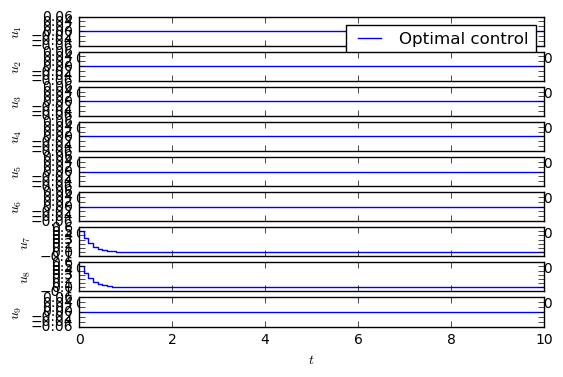

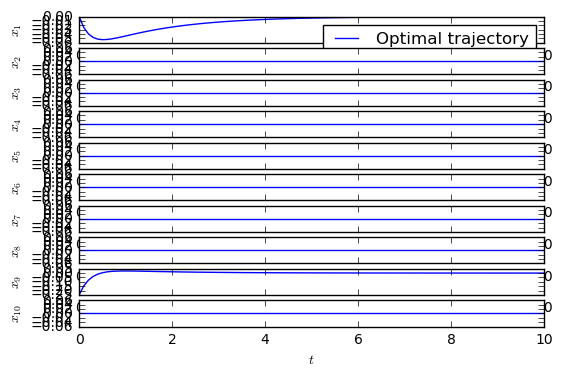

In [10]:
mpc_plt.input_sequence(u, model.t_s)
plt.show()
mpc_plt.state_trajectory(x, model.t_s)
plt.show()

In [11]:
import control
terminal_mode = 4
np.linalg.matrix_rank(control.ctrb(model._get_A(model.modes[terminal_mode]), model._get_B(model.modes[terminal_mode])))

8